# MODEL EVALUATION & Refinement

# Importing libraries

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [110]:
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",header=None)

In [111]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
          "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
          "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
          "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = headers
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df["price"] = df["price"].astype(int)

# Taking two column from datase into x_data and one column into y_data

In [112]:
x_data = df[["horsepower","curb-weight"]]
y_data = df["price"]

# TOPIC - Training and Testing Data

# train_test_split() - It is used to split the data for training and testing purpose

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,train_size=0.7,random_state=0)

# We make a model/object named"lm"

In [114]:
lm=LinearRegression()

# Train the model using the training data we obtained from the train_test_split()

In [115]:
lm.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Predicting the data into the testing data we obtain from train_test_split() by using the model 'lm' we trained from the training data

In [116]:
y_pred=lm.predict(x_test)
y_pred

array([14917.28692576, 10318.5099162 , 16414.76449475, 24202.1185041 ,
        6468.65634291,  7461.46717144,  5250.36832585, 16744.49326586,
        5231.67088602, 18926.45855799, 12771.9368725 , 10814.75119557,
        6056.69716081, 12668.87526796,  5709.46092791,  5793.82509263,
       22000.34786156,  8286.69861486,  8415.81624346,  8978.62698967,
        5522.07619237,  9896.73012635,  5953.10211783,  9315.96054736,
        6515.21529071,   903.90416966,  6580.51271207, 10618.16135816,
        7199.12854169, 16098.09799571,  3292.64921048, 15656.55388916,
        8725.69863043, 14299.12246712,  6159.22532692, 16780.16472904,
       10590.29985018,  5924.6661377 ,  8810.9655371 , 11836.16213914,
        5953.34832018, 18878.87376704,  6758.81544691,  9475.19653884,
       18731.18179979,  8013.75973657,  6299.76387857,  8435.37539152])

# Checking the data we trained , how well it performed by checking the score of the model

In [117]:
from sklearn.metrics import mean_squared_error,r2_score

In [118]:
print(r2_score(y_test,y_pred))

0.8464879316950766


In [119]:
lm.score(x_test,y_test)

0.8464879316950766

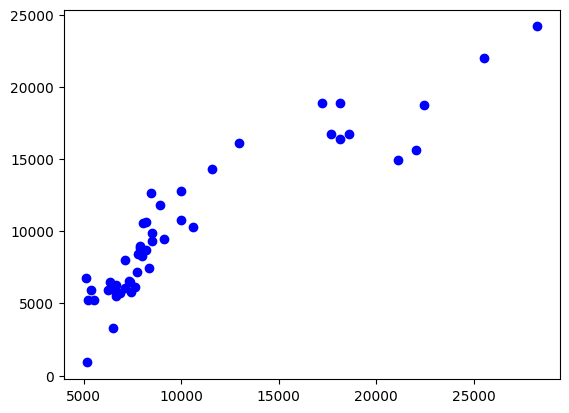

In [120]:
plt.scatter(y_test,y_pred,color="blue")
plt.plot(y_test.min)

In [122]:
hp=x_test["horsepower"]

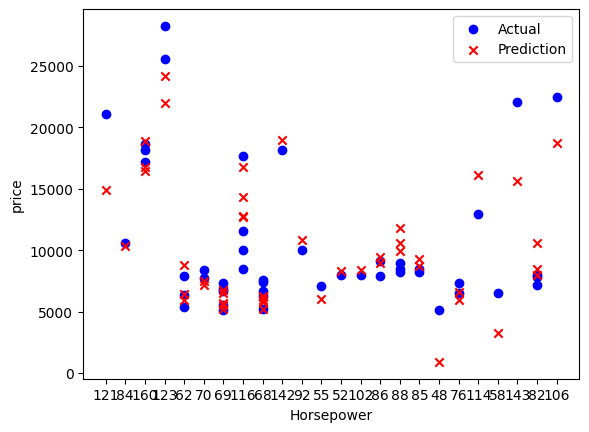

In [125]:
plt.scatter(hp,y_test,color="blue",label="Actual")
plt.scatter(hp,y_pred,color="red",marker="x",label="Prediction")
plt.xlabel("Horsepower")
plt.ylabel("price")
plt.legend()
plt.show()


In [106]:
 from sklearn.model_selection import cross_val_score,cross_val_predict

In [103]:
scores=cross_val_score(lm,x_data,y_data,cv=3)

In [104]:
scores

array([0.74083429, 0.61516984, 0.71353918])

In [105]:
np.mean(scores)

np.float64(0.6898477681382497)

In [107]:
yhat= cross_val_predict(lm,x_data,y_data,cv=3)

In [108]:
yhat

array([10053.41783756, 14044.77100192, 13988.71004863, 16907.83138294,
       10427.47858388, 10427.47858388, 13469.92258422, 13862.33020522,
        1849.52106266,  5478.02948176,  5727.74342239,  5412.79699633,
        5412.79699633,  8562.26887775,  6062.05324199,  6219.01629039,
        6219.01629039, 10909.57229894, 15144.54791159,  3852.33423406,
        5324.12742114,  4816.53690578,  6187.42418734,  6301.57913163,
        6686.85206861,  6786.73764487,  8696.79992403,  9074.938177  ,
        9181.95843727,  9667.11695051, 10926.90646516,  9659.98988729,
       25330.85508308,  5512.68257259,  5584.02941277,  5619.70283286,
        5905.09019359,  5940.76361368,  9680.36598928,  9858.73308974,
        9680.36598928,  9858.73308974,  9965.75335001, 13144.78429676,
       19292.84507234, 20969.49581662, 19150.15139197, 21112.18949698,
       21777.77101081,  5712.4537251 ,  5897.95550957,  6326.03655066,
        8683.55850606, 11402.52516509, 10273.97087611, 10668.6554528 ,
      